In [1]:
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
import os

def save_html_pages(search_text, pages=10, folder='hh_pages'):
    base_url = "https://hh.ru/search/vacancy"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }
    
    if not os.path.exists(folder):
        os.makedirs(folder)
    
    for page in range(pages):
        params = {
            "text": search_text,
            "salary": "",
            "ored_clusters": "true",
            "label": "with_salary",
            "page": page,
            "searchSessionId": "ae81045b-d74f-4a3c-850b-f0c933f042f6"
        }
        
        response = requests.get(base_url, params=params, headers=headers)
        if response.status_code != 200:
            print(f"Ошибка при запросе страницы {page + 1}")
            continue
        
        with open(f"{folder}/page_{page+1}.html", "w", encoding="utf-8") as f:
            f.write(response.text)
        
        time.sleep(1)
        print(f"Сохранена страница {page + 1}")

def parse_from_saved_html(folder='hh_pages'):
    vacancies = []
    
    for filename in os.listdir(folder):
        if filename.endswith('.html'):
            with open(f"{folder}/{filename}", "r", encoding="utf-8") as f:
                html = f.read()
            
            soup = BeautifulSoup(html, 'html.parser')
            vacancy_items = soup.find_all('div', class_='serp-item')
            
            for item in vacancy_items:
                title_tag = item.find('a', class_='serp-item__title')
                if title_tag:
                    title = title_tag.text.strip()
                    link = title_tag['href'].split('?')[0]
                    vacancies.append({'title': title, 'link': link})
            
            print(f"Обработан файл {filename}")
    
    return pd.DataFrame(vacancies)

# Шаг 1: Сохраняем HTML-страницы
save_html_pages("IT", pages=10)

# Шаг 2: Парсим данные из сохранённых HTML-файлов
df = parse_from_saved_html()

Сохранена страница 1
Сохранена страница 2
Сохранена страница 3
Сохранена страница 4
Сохранена страница 5
Сохранена страница 6
Сохранена страница 7
Сохранена страница 8
Сохранена страница 9
Сохранена страница 10
Обработан файл page_1.html
Обработан файл page_10.html
Обработан файл page_11.html
Обработан файл page_12.html
Обработан файл page_13.html
Обработан файл page_14.html
Обработан файл page_15.html
Обработан файл page_16.html
Обработан файл page_17.html
Обработан файл page_18.html
Обработан файл page_19.html
Обработан файл page_2.html
Обработан файл page_20.html
Обработан файл page_21.html
Обработан файл page_22.html
Обработан файл page_23.html
Обработан файл page_24.html
Обработан файл page_25.html
Обработан файл page_26.html
Обработан файл page_27.html
Обработан файл page_28.html
Обработан файл page_29.html
Обработан файл page_3.html
Обработан файл page_30.html
Обработан файл page_4.html
Обработан файл page_5.html
Обработан файл page_6.html
Обработан файл page_7.html
Обработан фа

In [3]:
def parse_vacancies_from_html(folder='hh_pages'):
    vacancies = []
    
    for filename in sorted(os.listdir(folder)):
        if filename.endswith('.html'):
            with open(f"{folder}/{filename}", "r", encoding="utf-8") as f:
                html = f.read()
            
            soup = BeautifulSoup(html, 'html.parser')
            
            # Находим все элементы с вакансиями по атрибуту data-qa
            vacancy_items = soup.find_all(attrs={"data-qa": "serp-item__title"})
            
            for item in vacancy_items:
                try:
                    # Извлекаем название вакансии
                    title = item.find('span', class_=lambda x: x and 'magritte-text' in x).text.strip()
                    
                    # Извлекаем ссылку
                    link = item['href'].split('?')[0]  # Убираем параметры из ссылки
                    
                    # Формируем полную ссылку если нужно
                    if not link.startswith('http'):
                        link = f'https://hh.ru{link}'
                    
                    vacancies.append({
                        'title': title,
                        'link': link
                    })
                except Exception as e:
                    print(f"Ошибка при обработке элемента в файле {filename}: {e}")
                    continue
            
            print(f"Обработан файл {filename} - найдено {len(vacancy_items)} вакансий")
    
    return pd.DataFrame(vacancies)

# Парсим данные
df = parse_vacancies_from_html()

if not df.empty:
    print(f"Успешно найдено {len(df)} вакансий!")
    print(df.head())
else:
    print("Вакансии не найдены. Проверьте:")
    print("1. Что файлы содержат данные (откройте их в браузере)")
    print("2. Что структура соответствует примеру")
    print("3. Попробуйте другой User-Agent при сохранении HTML")

Обработан файл page_1.html - найдено 20 вакансий
Обработан файл page_10.html - найдено 20 вакансий
Обработан файл page_11.html - найдено 20 вакансий
Обработан файл page_12.html - найдено 20 вакансий
Обработан файл page_13.html - найдено 20 вакансий
Обработан файл page_14.html - найдено 20 вакансий
Обработан файл page_15.html - найдено 20 вакансий
Обработан файл page_16.html - найдено 20 вакансий
Обработан файл page_17.html - найдено 20 вакансий
Обработан файл page_18.html - найдено 20 вакансий
Обработан файл page_19.html - найдено 20 вакансий
Обработан файл page_2.html - найдено 20 вакансий
Обработан файл page_20.html - найдено 20 вакансий
Обработан файл page_21.html - найдено 20 вакансий
Обработан файл page_22.html - найдено 20 вакансий
Обработан файл page_23.html - найдено 20 вакансий
Обработан файл page_24.html - найдено 20 вакансий
Обработан файл page_25.html - найдено 20 вакансий
Обработан файл page_26.html - найдено 20 вакансий
Обработан файл page_27.html - найдено 20 вакансий
Об

In [5]:
df = df[df['link'].str.contains('/vacancy/', case=False, na=False)].copy()
df.reset_index(drop=True, inplace=True)
df

,title,link
0,Аналитик данных,https://hh.ru/vacancy/121800375
1,Декларант-аналитик,https://hh.ru/vacancy/121754483
2,Аналитик данных,https://hh.ru/vacancy/121175102
3,Главный аналитик,https://hh.ru/vacancy/121707168
4,Аналитик,https://hh.ru/vacancy/121385461
...,...,...
535,Бизнес-аналитик,https://hh.ru/vacancy/114963659
536,Продуктовый аналитик,https://hh.ru/vacancy/121848023
537,Ведущий экономист-аналитик энергетического Хол...,https://hh.ru/vacancy/121882126
538,Маркетолог-аналитик (трейд-маркетинг),https://hh.ru/vacancy/121864444


In [9]:
df

,title,link
0,Аналитик данных,https://hh.ru/vacancy/121800375
1,Декларант-аналитик,https://hh.ru/vacancy/121754483
2,Аналитик данных,https://hh.ru/vacancy/121175102
3,Главный аналитик,https://hh.ru/vacancy/121707168
4,Аналитик,https://hh.ru/vacancy/121385461
...,...,...
535,Бизнес-аналитик,https://hh.ru/vacancy/114963659
536,Продуктовый аналитик,https://hh.ru/vacancy/121848023
537,Ведущий экономист-аналитик энергетического Хол...,https://hh.ru/vacancy/121882126
538,Маркетолог-аналитик (трейд-маркетинг),https://hh.ru/vacancy/121864444


In [11]:
from fake_useragent import UserAgent

# Настройки
VACANCY_FOLDER = 'hh_vacancies_pages'  # Папка для сохранения
DELAY = 1  # Задержка между запросами (в секундах)
TIMEOUT = 10  # Таймаут запроса

# Создаем папку, если ее нет
os.makedirs(VACANCY_FOLDER, exist_ok=True)

# Инициализируем UserAgent
ua = UserAgent()

def save_vacancy_page(url, index):
    """Сохраняет страницу вакансии в HTML"""
    try:
        headers = {
            'User-Agent': ua.random,
            'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
            'Accept-Language': 'ru-RU,ru;q=0.8,en-US;q=0.5,en;q=0.3'
        }
        
        response = requests.get(url, headers=headers, timeout=TIMEOUT)
        response.raise_for_status()  # Проверяем на ошибки
        
        # Сохраняем HTML
        filename = os.path.join(VACANCY_FOLDER, f'vacancy_{index}.html')
        with open(filename, 'w', encoding='utf-8') as f:
            f.write(response.text)
            
        return True
    
    except Exception as e:
        print(f'Ошибка при сохранении {url}: {str(e)}')
        return False

# Основной процесс сохранения
for index, row in df.iterrows():
    print(f'Обрабатываю вакансию {index+1}/{len(df)}: {row["title"]}')
    
    success = save_vacancy_page(row['link'], index)
    
    if success:
        print(f'Успешно сохранено: vacancy_{index}.html')
    else:
        print(f'Пропущено: {row["link"]}')
    
    # Соблюдаем задержку между запросами
    if index < len(df) - 1:
        time.sleep(DELAY)

print('\nГотово! Все вакансии сохранены в папку:', os.path.abspath(VACANCY_FOLDER))

Обрабатываю вакансию 1/540: Аналитик данных
Успешно сохранено: vacancy_0.html
Обрабатываю вакансию 2/540: Декларант-аналитик
Успешно сохранено: vacancy_1.html
Обрабатываю вакансию 3/540: Аналитик данных
Успешно сохранено: vacancy_2.html
Обрабатываю вакансию 4/540: Главный аналитик
Успешно сохранено: vacancy_3.html
Обрабатываю вакансию 5/540: Аналитик
Успешно сохранено: vacancy_4.html
Обрабатываю вакансию 6/540: Аналитик
Успешно сохранено: vacancy_5.html
Обрабатываю вакансию 7/540: Аналитик
Успешно сохранено: vacancy_6.html
Обрабатываю вакансию 8/540: Химик-аналитик
Успешно сохранено: vacancy_7.html
Обрабатываю вакансию 9/540: Аналитик
Успешно сохранено: vacancy_8.html
Обрабатываю вакансию 10/540: Аналитик (товарная аналитика)
Успешно сохранено: vacancy_9.html
Обрабатываю вакансию 11/540: Аналитик
Успешно сохранено: vacancy_10.html
Обрабатываю вакансию 12/540: Аналитик
Успешно сохранено: vacancy_11.html
Обрабатываю вакансию 13/540: Аналитик
Успешно сохранено: vacancy_12.html
Обрабатываю

In [13]:
import os
import pandas as pd
from bs4 import BeautifulSoup

def parse_skills(soup):
    """Парсит ключевые навыки из HTML"""
    skills = []
    skill_items = soup.find_all('li', {'data-qa': 'skills-element'})
    
    for item in skill_items:
        skill_label = item.find('div', class_='magritte-tag__label___YHV-o_3-1-23')
        if skill_label:
            skills.append(skill_label.text.strip())
    
    return skills

def parse_vacancy_details(html_content):
    """Парсит детали вакансии из HTML"""
    soup = BeautifulSoup(html_content, 'html.parser')
    
    # Название вакансии
    title_tag = soup.find('h1', {'data-qa': 'vacancy-title'})
    title = title_tag.text.strip() if title_tag else ''
    
    # Компания
    company_tag = soup.find('a', {'data-qa': 'vacancy-company-name'})
    company = company_tag.text.strip() if company_tag else ''
    
    # Описание вакансии
    description_tag = soup.find('div', {'data-qa': 'vacancy-description'})
    description = description_tag.text.strip() if description_tag else ''
    
    # Ключевые навыки
    key_skills = parse_skills(soup)
    
    # Ссылка
    link_tag = soup.find('link', {'rel': 'canonical'})
    link = link_tag['href'] if link_tag else ''
    
    return {
        'title': title,
        'company': company,
        'key_skills': ', '.join(key_skills),
        'description': description,
        'link': link
    }

def parse_all_vacancies(folder='hh_vacancies_pages'):
    """Парсит все вакансии из сохраненных HTML-файлов"""
    vacancies = []
    
    for filename in os.listdir(folder):
        if filename.endswith('.html'):
            with open(os.path.join(folder, filename), 'r', encoding='utf-8') as f:
                html = f.read()
            
            details = parse_vacancy_details(html)
            vacancies.append(details)
            
            print(f'Обработан файл: {filename}')
    
    return pd.DataFrame(vacancies)

# Парсим все вакансии
df_vacancies = parse_all_vacancies()

# Сохраняем результаты
output_file = 'parsed_vacancies_with_skills.xlsx'
df_vacancies.to_excel(output_file, index=False)

print(f'\nГотово! Результаты сохранены в файл: {output_file}')
print('\nПример данных:')
print(df_vacancies.head())

Обработан файл: vacancy_0.html
Обработан файл: vacancy_1.html
Обработан файл: vacancy_10.html
Обработан файл: vacancy_100.html
Обработан файл: vacancy_101.html
Обработан файл: vacancy_102.html
Обработан файл: vacancy_103.html
Обработан файл: vacancy_104.html
Обработан файл: vacancy_105.html
Обработан файл: vacancy_106.html
Обработан файл: vacancy_107.html
Обработан файл: vacancy_108.html
Обработан файл: vacancy_109.html
Обработан файл: vacancy_11.html
Обработан файл: vacancy_110.html
Обработан файл: vacancy_111.html
Обработан файл: vacancy_112.html
Обработан файл: vacancy_113.html
Обработан файл: vacancy_114.html
Обработан файл: vacancy_115.html
Обработан файл: vacancy_116.html
Обработан файл: vacancy_117.html
Обработан файл: vacancy_118.html
Обработан файл: vacancy_119.html
Обработан файл: vacancy_12.html
Обработан файл: vacancy_120.html
Обработан файл: vacancy_121.html
Обработан файл: vacancy_122.html
Обработан файл: vacancy_123.html
Обработан файл: vacancy_124.html
Обработан файл: v

In [31]:
import os
import pandas as pd
from bs4 import BeautifulSoup

def parse_salary(soup):
    """Парсит зарплату из HTML"""
    salary_tag = soup.find('span', {'data-qa': 'vacancy-salary'}) or \
                 soup.find('span', {'data-qa': 'vacancy-salary-compensation-type-net'}) or \
                 soup.find('span', {'data-qa': 'vacancy-salary-compensation-type-gross'})
    
    if salary_tag:
        # Очищаем текст зарплаты от HTML-сущностей и лишних пробелов
        salary_text = ' '.join(salary_tag.text.split())
        return salary_text
    return ''

def parse_skills(soup):
    """Парсит ключевые навыки из HTML"""
    skills = []
    skill_items = soup.find_all('li', {'data-qa': 'skills-element'})
    
    for item in skill_items:
        skill_label = item.find('div', class_=lambda x: x and 'magritte-tag__label' in x)
        if skill_label:
            skills.append(skill_label.text.strip())
    
    return skills

def parse_vacancy_details(html_content):
    """Парсит детали вакансии из HTML"""
    soup = BeautifulSoup(html_content, 'html.parser')
    
    # Название вакансии
    title_tag = soup.find('h1', {'data-qa': 'vacancy-title'})
    title = title_tag.text.strip() if title_tag else ''
    
    # Компания
    company_tag = soup.find('a', {'data-qa': 'vacancy-company-name'})
    company = company_tag.text.strip() if company_tag else ''
    
    # Описание вакансии
    description_tag = soup.find('div', {'data-qa': 'vacancy-description'})
    description = description_tag.text.strip() if description_tag else ''
    
    # Ключевые навыки
    key_skills = parse_skills(soup)
    
    # Зарплата
    salary = parse_salary(soup)
    
    # Ссылка
    link_tag = soup.find('link', {'rel': 'canonical'})
    link = link_tag['href'] if link_tag else ''
    
    return {
        'title': title,
        'company': company,
        'key_skills': ', '.join(key_skills),
        'description': description,
        'salary': salary,
        'link': link
    }

def parse_all_vacancies(folder='hh_vacancies_pages'):
    """Парсит все вакансии из сохраненных HTML-файлов"""
    vacancies = []
    
    for filename in sorted(os.listdir(folder)):
        if filename.endswith('.html'):
            with open(os.path.join(folder, filename), 'r', encoding='utf-8') as f:
                html = f.read()
            
            details = parse_vacancy_details(html)
            vacancies.append(details)
            
            print(f'Обработан файл: {filename}')
    
    return pd.DataFrame(vacancies)

# Парсим все вакансии
df_vacancies = parse_all_vacancies()

print(f'\nГотово! Результаты сохранены в файл: {output_file}')
print('\nПример данных с зарплатами:')
print(df_vacancies[['title', 'company', 'salary']].head(10))

Обработан файл: vacancy_0.html
Обработан файл: vacancy_1.html
Обработан файл: vacancy_10.html
Обработан файл: vacancy_100.html
Обработан файл: vacancy_101.html
Обработан файл: vacancy_102.html
Обработан файл: vacancy_103.html
Обработан файл: vacancy_104.html
Обработан файл: vacancy_105.html
Обработан файл: vacancy_106.html
Обработан файл: vacancy_107.html
Обработан файл: vacancy_108.html
Обработан файл: vacancy_109.html
Обработан файл: vacancy_11.html
Обработан файл: vacancy_110.html
Обработан файл: vacancy_111.html
Обработан файл: vacancy_112.html
Обработан файл: vacancy_113.html
Обработан файл: vacancy_114.html
Обработан файл: vacancy_115.html
Обработан файл: vacancy_116.html
Обработан файл: vacancy_117.html
Обработан файл: vacancy_118.html
Обработан файл: vacancy_119.html
Обработан файл: vacancy_12.html
Обработан файл: vacancy_120.html
Обработан файл: vacancy_121.html
Обработан файл: vacancy_122.html
Обработан файл: vacancy_123.html
Обработан файл: vacancy_124.html
Обработан файл: v

In [33]:
df_vacancies

,title,company,key_skills,description,salary,link
0,Аналитик данных,BM Electronics (ООО «GOODS AND SERVICES IMPEX»),"Русский — B2 — Средне-продвинутый, Узбекский —...","Основные обязанности: Сбор, обработка и анал...",от 4 000 000 до 5 000 000 so'm за месяц на руки,https://tashkent.hh.uz/vacancy/121800375
1,Декларант-аналитик,Байкал Экспресс,"Таможенное оформление, Коды ТН ВЭД, Альта ГТД,...",BAIKAL EXPRESS - это крупная транспортно-логис...,от 150 000 ₽ за месяц на руки,https://spb.hh.ru/vacancy/121754483
2,Аналитик,ООО ТД ГраСС,,Компания GRASS является одним из крупнейших пр...,от 70 000 ₽ за месяц на руки,https://volzhskiy.hh.ru/vacancy/121877354
3,Шофер в IT-сервис на автомобиле компании (легк...,Aliot Group,"Честность, Ответственность, Исполнительность, ...",Шофер в IT-сервис (легкие посылки и документы)...,до 275 130 ₽ за месяц на руки,https://kazan.hh.ru/vacancy/121200835
4,IT-Специалист,Гармония Здоровья,,"Аптечная сеть ""Гармония здоровья"" является одн...",от 75 000 до 90 000 ₽ за месяц на руки,https://irkutsk.hh.ru/vacancy/121317880
...,...,...,...,...,...,...
535,Телемаркетолог/Лидоруб/Оператор Call-центра (IT),JVO.ru,"amoCRM, IP-телефония, B2B-маркетинг, Выявление...",JVO - это платформа на базе AI с продвинутой ...,от 75 000 до 80 000 ₽ за месяц на руки,https://kazan.hh.ru/vacancy/121145016
536,Менеджер по продажам IT услуг,ООО Автоматизация Среднего Бизнеса,"Поиск и привлечение клиентов, Заключение догов...",Обязанности: Поиск и привлечение новых клиент...,от 50 000 до 400 000 ₽ за месяц на руки,https://hh.ru/vacancy/121840755
537,Менеджер по продажам (сфера IT),Simple Digital,,"О компании Мы – IT-компания, занимающаяся внед...",от 170 000 ₽ за месяц на руки,https://orenburg.hh.ru/vacancy/121676892
538,Водитель IT-гиганта (категория В),ИП Журавлева Елена Александровна,Курьерская доставка,Крупнейший IT-холдинг объявляет срочный набор ...,до 2 513 $ за месяц на руки,https://shymkent.hh.kz/vacancy/121676974


In [35]:
import pandas as pd
import re

# 1. Удаляем вакансии, нерелевантые
df_filtered = df_vacancies[~df_vacancies['title'].str.contains('курьер|курьер|курьера|курьеры|продаж|Шофер|Водитель', 
                                                              case=False, 
                                                              na=False, 
                                                              regex=True)]

print(f"Осталось вакансий после удаления курьерских: {len(df_filtered)}")

Осталось вакансий после удаления курьерских: 377


In [37]:
df_filtered

,title,company,key_skills,description,salary,link
0,Аналитик данных,BM Electronics (ООО «GOODS AND SERVICES IMPEX»),"Русский — B2 — Средне-продвинутый, Узбекский —...","Основные обязанности: Сбор, обработка и анал...",от 4 000 000 до 5 000 000 so'm за месяц на руки,https://tashkent.hh.uz/vacancy/121800375
1,Декларант-аналитик,Байкал Экспресс,"Таможенное оформление, Коды ТН ВЭД, Альта ГТД,...",BAIKAL EXPRESS - это крупная транспортно-логис...,от 150 000 ₽ за месяц на руки,https://spb.hh.ru/vacancy/121754483
2,Аналитик,ООО ТД ГраСС,,Компания GRASS является одним из крупнейших пр...,от 70 000 ₽ за месяц на руки,https://volzhskiy.hh.ru/vacancy/121877354
4,IT-Специалист,Гармония Здоровья,,"Аптечная сеть ""Гармония здоровья"" является одн...",от 75 000 до 90 000 ₽ за месяц на руки,https://irkutsk.hh.ru/vacancy/121317880
5,IT Администратор / Системный администратор / H...,ТОО MAT Group,,Обязанности: Техническое сопровождение внутре...,от 400 000 до 450 000 ₸ за месяц на руки,https://almaty.hh.kz/vacancy/121610221
...,...,...,...,...,...,...
530,Менеджер IT-проектов/Product Owner,Тензор,,Мы - Компания Тензор. С 1999 года создаем и вн...,до 350 000 ₽ за месяц до вычета налогов,https://novosibirsk.hh.ru/vacancy/119869308
531,Менеджер IT-проектов/Product Owner,Тензор,,Мы - Компания Тензор. С 1999 года создаем и вн...,до 350 000 ₽ за месяц до вычета налогов,https://ufa.hh.ru/vacancy/119869283
532,"Growth маркетолог (IT, SaaS)",Marquiz,"Маркетинговый анализ, Запуск маркетинговых кам...",Привет ✌ Мы — IT-команда Marquiz. Развиваем се...,от 120 000 до 160 000 ₽ за месяц до вычета нал...,https://ekaterinburg.hh.ru/vacancy/121494818
534,Аккаунт-менеджер / KAM / Key account manager в...,ООО Норд Клан,"Ведение переговоров, Организаторские навыки, Д...",Nord Clan — компания по разработке ПО на заказ...,от 100 000 ₽ за месяц на руки,https://ulyanovsk.hh.ru/vacancy/121266804


In [39]:
def clean_hh_links(df):
    """
    Приводит ссылки на вакансии к единому формату https://hh.ru/vacancy/{id}
    """
    # Создаем копию DataFrame, чтобы избежать предупреждений
    df_clean = df.copy()
    
    # Функция для обработки одной ссылки
    def process_link(link):
        if pd.isna(link):
            return link
        
        # Ищем ID вакансии в ссылке (после /vacancy/)
        match = re.search(r'/vacancy/(\d+)', link)
        if match:
            vacancy_id = match.group(1)
            return f'https://hh.ru/vacancy/{vacancy_id}'
        return link
    
    # Применяем функцию ко всем ссылкам
    df_clean['link'] = df_clean['link'].apply(process_link)
    
    return df_clean

# Применяем функцию к нашему DataFrame
df_filtered = clean_hh_links(df_filtered)

df_filtered

,title,company,key_skills,description,salary,link
0,Аналитик данных,BM Electronics (ООО «GOODS AND SERVICES IMPEX»),"Русский — B2 — Средне-продвинутый, Узбекский —...","Основные обязанности: Сбор, обработка и анал...",от 4 000 000 до 5 000 000 so'm за месяц на руки,https://hh.ru/vacancy/121800375
1,Декларант-аналитик,Байкал Экспресс,"Таможенное оформление, Коды ТН ВЭД, Альта ГТД,...",BAIKAL EXPRESS - это крупная транспортно-логис...,от 150 000 ₽ за месяц на руки,https://hh.ru/vacancy/121754483
2,Аналитик,ООО ТД ГраСС,,Компания GRASS является одним из крупнейших пр...,от 70 000 ₽ за месяц на руки,https://hh.ru/vacancy/121877354
4,IT-Специалист,Гармония Здоровья,,"Аптечная сеть ""Гармония здоровья"" является одн...",от 75 000 до 90 000 ₽ за месяц на руки,https://hh.ru/vacancy/121317880
5,IT Администратор / Системный администратор / H...,ТОО MAT Group,,Обязанности: Техническое сопровождение внутре...,от 400 000 до 450 000 ₸ за месяц на руки,https://hh.ru/vacancy/121610221
...,...,...,...,...,...,...
530,Менеджер IT-проектов/Product Owner,Тензор,,Мы - Компания Тензор. С 1999 года создаем и вн...,до 350 000 ₽ за месяц до вычета налогов,https://hh.ru/vacancy/119869308
531,Менеджер IT-проектов/Product Owner,Тензор,,Мы - Компания Тензор. С 1999 года создаем и вн...,до 350 000 ₽ за месяц до вычета налогов,https://hh.ru/vacancy/119869283
532,"Growth маркетолог (IT, SaaS)",Marquiz,"Маркетинговый анализ, Запуск маркетинговых кам...",Привет ✌ Мы — IT-команда Marquiz. Развиваем се...,от 120 000 до 160 000 ₽ за месяц до вычета нал...,https://hh.ru/vacancy/121494818
534,Аккаунт-менеджер / KAM / Key account manager в...,ООО Норд Клан,"Ведение переговоров, Организаторские навыки, Д...",Nord Clan — компания по разработке ПО на заказ...,от 100 000 ₽ за месяц на руки,https://hh.ru/vacancy/121266804


In [43]:
df_filtered.to_excel('IT_vacancies_analyst.xlsx', index=0)

In [120]:
df=pd.read_excel('all_habr_.xlsx')
df

,URL,Rating,Title,Article text,Text length,Hashtags
0,https://habr.com/ru/articles/804003/,4,В «Яндекс Картах» обновился режим парковки,«Яндекс Карты» обновили режим парковки: прилож...,1028,"яндекс, яндекс карты, парковки, москва"
1,https://habr.com/ru/articles/804005/,8,«Швабе» представил лазерный микроскоп для ранн...,Холдинг «Швабе» (входит в госкорпорацию «Росте...,1844,"микроскоп, швабе, ростех, онкология, изучение"
2,https://habr.com/ru/articles/804009/,9,Мини-ПК GEEKOM A7: что это за девайс и на что ...,Производители электроники каждую неделю выпуск...,4663,"гаджеты, настольные компьютеры, компьютерное ж..."
3,https://habr.com/ru/articles/804013/,8,Верховный суд обязал ВТБ выплатить НДС поставщ...,Верховный суд обязал банк ВТБ заплатить НДС в ...,1951,"втб, Энвижн Груп, ндс, microsoft"
4,https://habr.com/ru/articles/804017/,6,"Канадские школы подали в суд на Meta*, ByteDan...","Несколько канадских школ в Торонто, Оттаве и р...",1599,"meta, tiktok, facebook, snapchat, соцсети, канада"
...,...,...,...,...,...,...
2244,https://habr.com/ru/articles/800989/,7,Обзор планшета Blackview MEGA 1: больше экрана...,Планшет Blackview MEGA 1 это универсальное реш...,23898,"планшет, Blackview Mega 1"
2245,https://habr.com/ru/articles/800991/,0,Минцифры получит полномочия по проверке россий...,Правительство наделило Минцифры новыми полномо...,1019,"геинформационные технологии, минцифры, законод..."
2246,https://habr.com/ru/articles/800993/,52,"Игра, которую невозможно не полюбить","Здравствуйте, уважаемые хабровцы!Меня зовут Ер...",27610,"тогызкумалак, настольные игры, казахстан"
2247,https://habr.com/ru/articles/800997/,7,Применение стационарных умных приёмников звука...,"Фомичев В.А., полковник запаса, Крюков В.А.,...",11518,eda


# Аналитика

In [48]:
df=pd.read_excel('IT_vacancies_analyst.xlsx')
df.head()

,title,company,key_skills,description,salary,link
0,Аналитик данных,BM Electronics (ООО «GOODS AND SERVICES IMPEX»),"Русский — B2 — Средне-продвинутый, Узбекский —...","Основные обязанности: Сбор, обработка и анал...",от 4 000 000 до 5 000 000 so'm за месяц на руки,https://hh.ru/vacancy/121800375
1,Декларант-аналитик,Байкал Экспресс,"Таможенное оформление, Коды ТН ВЭД, Альта ГТД,...",BAIKAL EXPRESS - это крупная транспортно-логис...,от 150 000 ₽ за месяц на руки,https://hh.ru/vacancy/121754483
2,Менеджер проектов в сфере IT,ООО Неокорд,Английский — C1 — Продвинутый,"Вас приветствует компания ""Неокорд""! Мы ищем М...",от 30 000 до 50 000 ₽ за месяц на руки,https://hh.ru/vacancy/121826624
3,IT-специалист на объектах дорожной инфраструктуры,ООО ДЭП №2,"ИТ-инфраструктура, Системы видеонаблюдения, SI...",Обязанности: Настройка и обслуживание серверо...,от 113 000 ₽ за месяц до вычета налогов,https://hh.ru/vacancy/121847884
4,Аналитик,Alpine floor,"Аналитика продаж, Анализ продаж, Планирование ...",Alpine Floor – торгово-производственная группа...,от 140 000 до 180 000 ₽ за месяц на руки,https://hh.ru/vacancy/120625066


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        476 non-null    object
 1   company      476 non-null    object
 2   key_skills   476 non-null    object
 3   description  476 non-null    object
 4   salary       476 non-null    object
 5   link         476 non-null    object
dtypes: object(6)
memory usage: 22.4+ KB


In [54]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [58]:
pip install textblob

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 1.1 MB/s eta 0:00:00


In [60]:
from textblob import TextBlob

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\гыук\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\гыук\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


=== БАЗОВАЯ СТАТИСТИКА ===
Всего вакансий: 476
Уникальных компаний: 316
Вакансии с указанной зарплатой: 476

=== ТОП-10 КОМПАНИЙ ===
company
Первый Бит                                                      21
Тензор                                                           8
Первая Розничная Компания                                        6
СНС, Группа компаний                                             6
АО ДОНУГОЛЬ                                                      5
ГК Орион телеком                                                 4
Сибирская генерирующая Компания                                  4
JVO.ru                                                           4
Яндекс Команда для бизнеса                                       4
ФГБУ ИАЦ Судебный департамент, филиал в Республике Татарстан     3
Name: count, dtype: int64


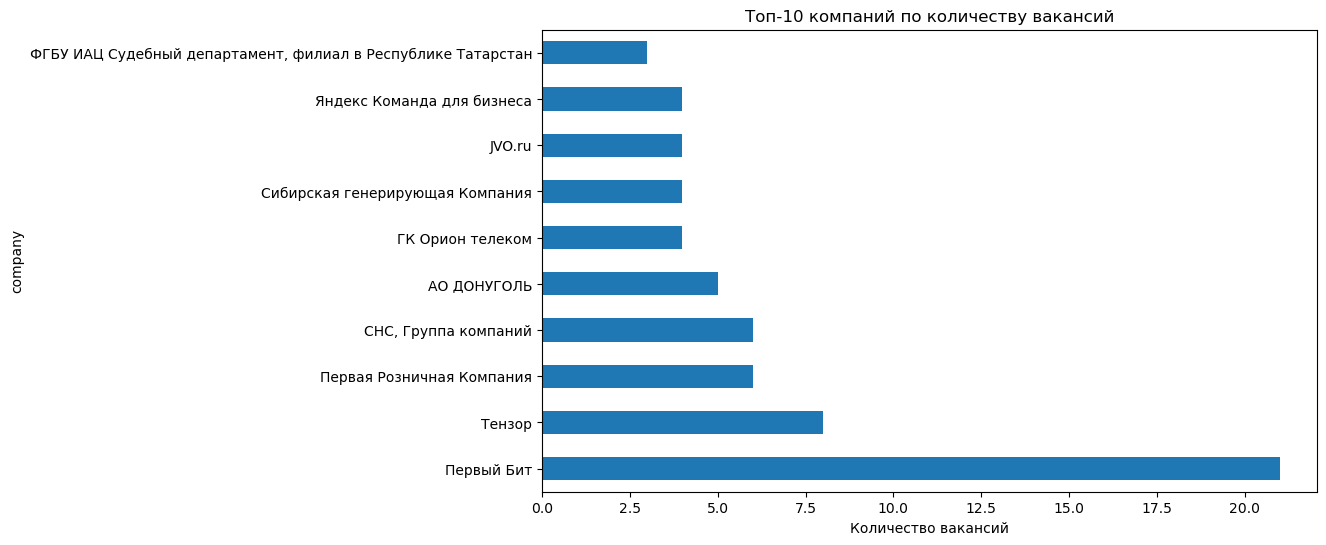


=== ТОП-10 НАВЫКОВ ===
                    Навык  Количество
0  Аналитическое мышление          58
1    Деловая коммуникация          53
2         Деловое общение          50
3            Настройка ПК          46
4            Настройка ПО          44
5       Деловая переписка          43
6   Телефонные переговоры          43
7   Техническая поддержка          43
8                     SQL          40
9     Ведение переговоров          40


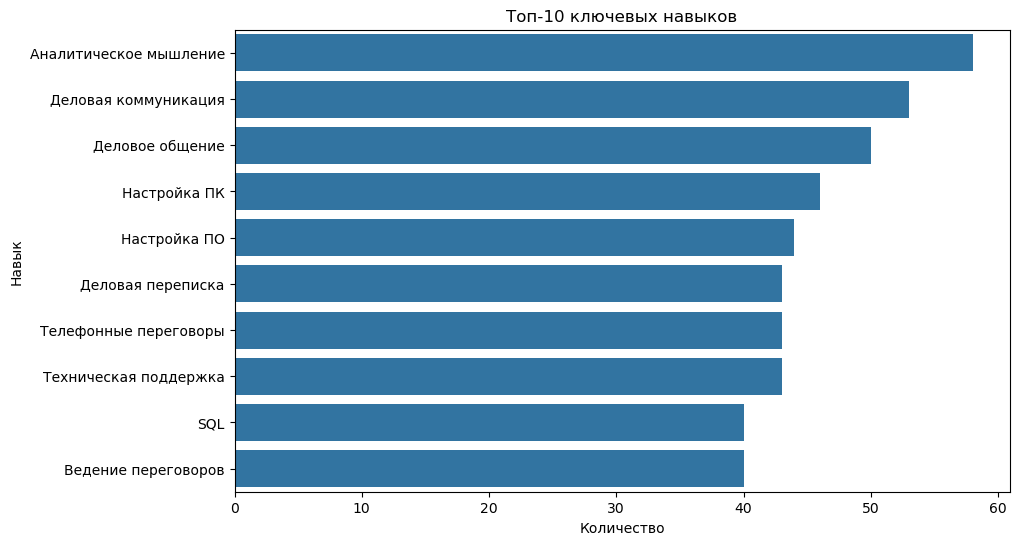

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Скачиваем необходимые ресурсы NLTK
nltk.download('punkt')
nltk.download('stopwords')


# 1. Базовая статистика
print("=== БАЗОВАЯ СТАТИСТИКА ===")
print(f"Всего вакансий: {len(df)}")
print(f"Уникальных компаний: {df['company'].nunique()}")
print(f"Вакансии с указанной зарплатой: {df['salary'].str.contains('₽|$|€|£').sum()}")

# 2. Топ-10 компаний по количеству вакансий
top_companies = df['company'].value_counts().head(10)
print("\n=== ТОП-10 КОМПАНИЙ ===")
print(top_companies)

plt.figure(figsize=(10, 6))
top_companies.plot(kind='barh')
plt.title('Топ-10 компаний по количеству вакансий')
plt.xlabel('Количество вакансий')
plt.show()

# 3. Анализ ключевых навыков
all_skills = ', '.join(df['key_skills'].dropna()).split(', ')
skills_counter = Counter(all_skills)
top_skills = pd.DataFrame(skills_counter.most_common(10), columns=['Навык', 'Количество'])

print("\n=== ТОП-10 НАВЫКОВ ===")
print(top_skills)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_skills, y='Навык', x='Количество')
plt.title('Топ-10 ключевых навыков')
plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\гыук\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\гыук\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


=== BASIC STATISTICS ===
Total vacancies: 476
Unique companies: 316
Vacancies with specified salary: 476

=== TOP 10 COMPANIES ===
company
Первый Бит                                                      21
Тензор                                                           8
Первая Розничная Компания                                        6
СНС, Группа компаний                                             6
АО ДОНУГОЛЬ                                                      5
ГК Орион телеком                                                 4
Сибирская генерирующая Компания                                  4
JVO.ru                                                           4
Яндекс Команда для бизнеса                                       4
ФГБУ ИАЦ Судебный департамент, филиал в Республике Татарстан     3
Name: count, dtype: int64


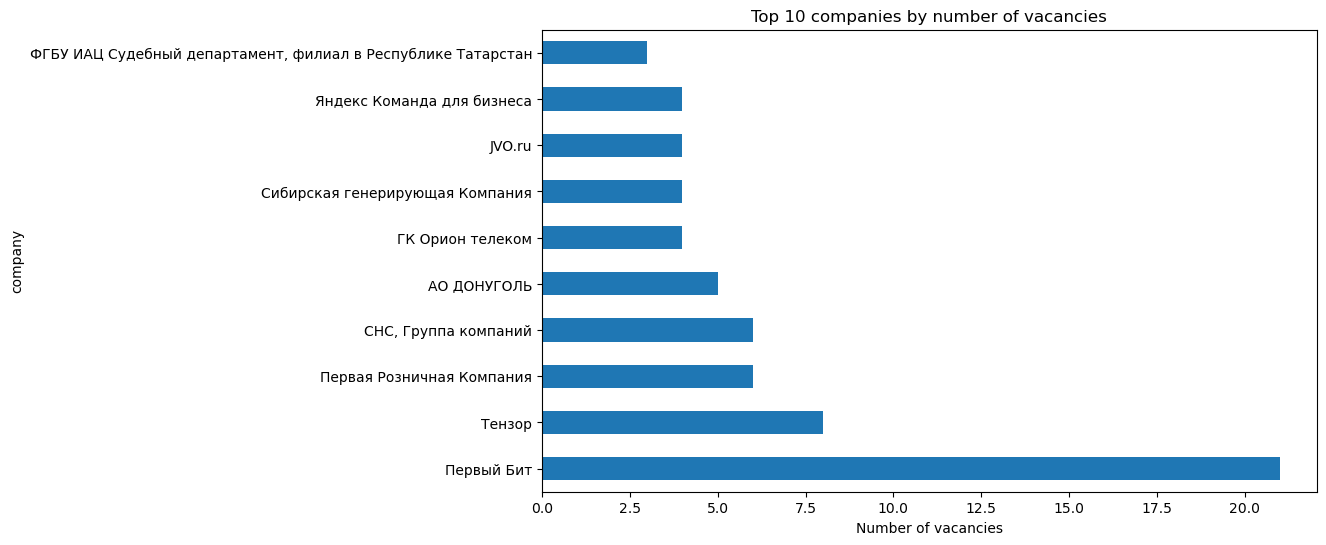


=== TOP 10 SKILLS ===
                    Skill  Count
0  Аналитическое мышление     58
1    Деловая коммуникация     53
2         Деловое общение     50
3            Настройка ПК     46
4            Настройка ПО     44
5       Деловая переписка     43
6   Телефонные переговоры     43
7   Техническая поддержка     43
8                     SQL     40
9     Ведение переговоров     40


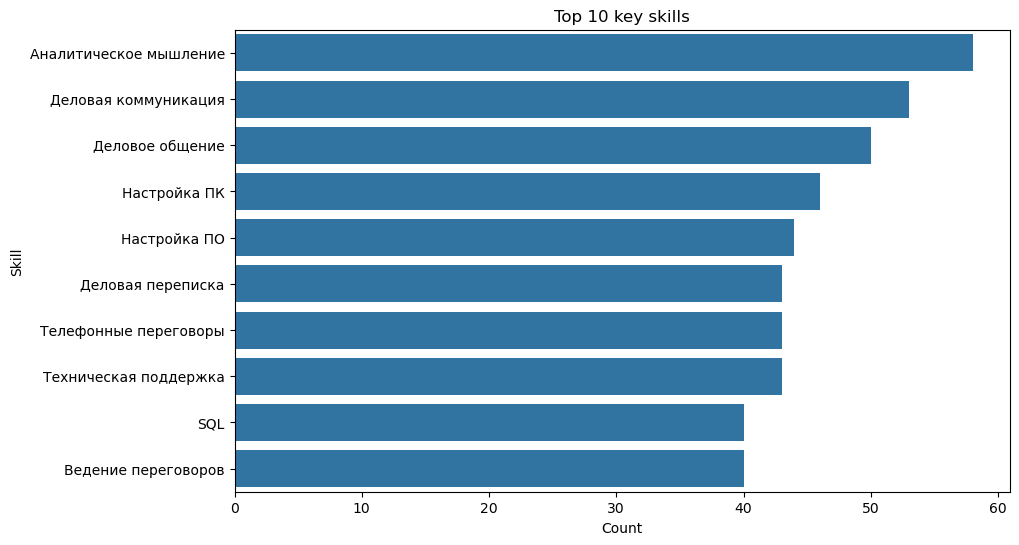

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')


# 1. Basic statistics
print("=== BASIC STATISTICS ===")
print(f"Total vacancies: {len(df)}")
print(f"Unique companies: {df['company'].nunique()}")
print(f"Vacancies with specified salary: {df['salary'].str.contains('₽|$|€|£').sum()}")

# 2. Top 10 companies by number of vacancies
top_companies = df['company'].value_counts().head(10)
print("\n=== TOP 10 COMPANIES ===")
print(top_companies)

plt.figure(figsize=(10, 6))
top_companies.plot(kind='barh')
plt.title('Top 10 companies by number of vacancies')
plt.xlabel('Number of vacancies')
plt.show()

# 3. Key skills analysis
all_skills = ', '.join(df['key_skills'].dropna()).split(', ')
skills_counter = Counter(all_skills)
top_skills = pd.DataFrame(skills_counter.most_common(10), columns=['Skill', 'Count'])

print("\n=== TOP 10 SKILLS ===")
print(top_skills)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_skills, y='Skill', x='Count')
plt.title('Top 10 key skills')
plt.show()


=== Salary Statistics in IT===
Avg salary: 261700 ₽
Median salary: 100000 ₽
Max salary: 15000000 ₽
Min salary: 500 ₽


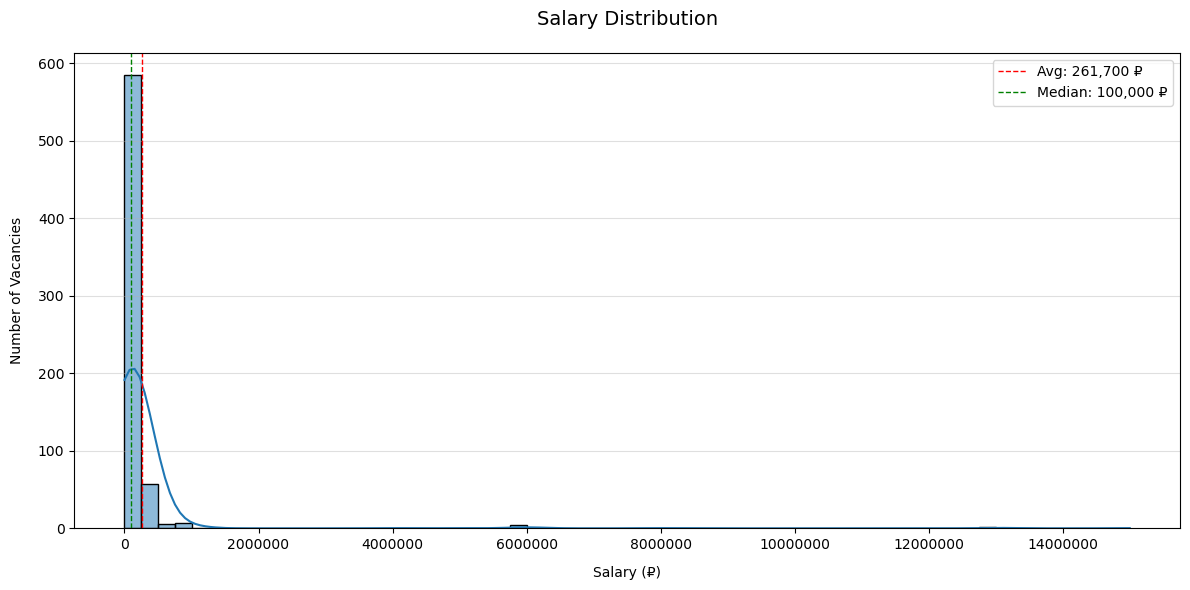

In [100]:
# 2. Анализ зарплат (если есть данные)
if df['salary'].str.contains('₽').any():
    # Извлекаем числа из зарплат
    salary_numbers = df['salary'].str.extractall(r'(\d[\d\s]+)')[0].str.replace(' ', '').astype(int)
    print("\n=== Salary Statistics in IT===")
    print(f"Avg salary: {salary_numbers.mean():.0f} ₽")
    print(f"Median salary: {salary_numbers.median():.0f} ₽")
    print(f"Max salary: {salary_numbers.max():.0f} ₽")
    print(f"Min salary: {salary_numbers.min():.0f} ₽")


    # Визуализация распределения зарплат
    plt.figure(figsize=(12, 6))
    ax = sns.histplot(salary_numbers, bins=60, kde=True)
    
    # Форматирование оси X без экспоненты

    plt.ticklabel_format(axis='x', useOffset=False, style='plain')
    
    plt.title('Salary Distribution', pad=20, fontsize=14)
    plt.xlabel('Salary (₽)', labelpad=10)
    plt.ylabel('Number of Vacancies', labelpad=10)
    plt.grid(axis='y', alpha=0.4)
    
    # Добавляем среднюю и медиану
    plt.axvline(salary_numbers.mean(), color='r', linestyle='--', linewidth=1, label=f'Avg: {salary_numbers.mean():,.0f} ₽')
    plt.axvline(salary_numbers.median(), color='g', linestyle='--', linewidth=1, label=f'Median: {salary_numbers.median():,.0f} ₽')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [108]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re

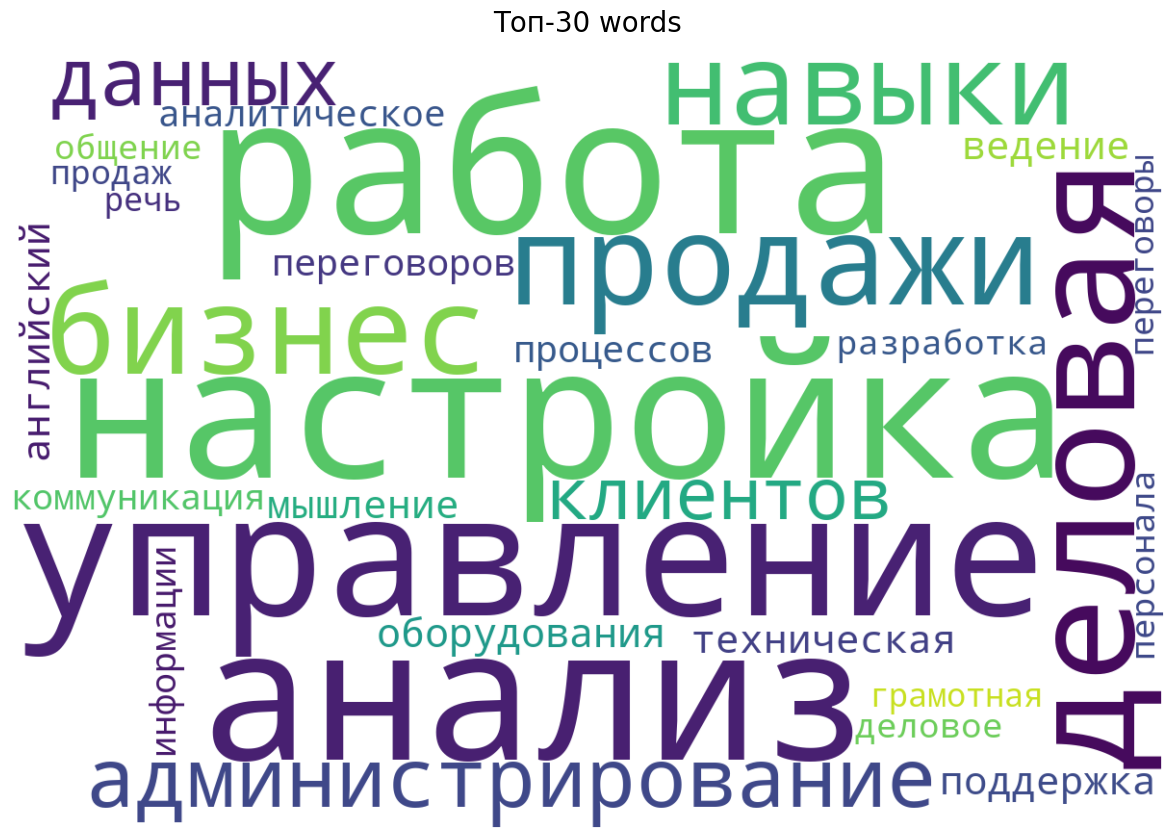

In [114]:
texts = df['key_skills'].str.cat(sep=' ').lower()

# Очистка текста и подсчёт слов
words = re.findall(r'\b[а-яё]{4,}\b', texts)
word_freq = Counter(words).most_common(100)

# Параметры облака
wordcloud = WordCloud(
    width=1200,
    height=800,
    background_color='white',
    colormap='viridis',
    max_words=30,
    relative_scaling=0.5,
    min_font_size=10,
    max_font_size=200,
    random_state=42
).generate_from_frequencies(dict(word_freq))

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Топ-30 words', fontsize=20, pad=20)
plt.show()